<a href="https://colab.research.google.com/github/kaioschi/imersao_dados_4/blob/main/Imersao_dados_4_organizado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação de bibliotecas de dados

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
!pip install matplotlib --upgrade  # para usar métodos da versão mais recente do matplotlib

In [ ]:
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
dados = pd.read_csv(url)

ibge_url = "https://gist.githubusercontent.com/tgcsantos/85f8c7b0a2edbc3e27fcad619b37d886/raw/a4954781e6bca9cb804062a3eea0b3b84679daf4/Basico_SP1.csv"
ibge = pd.read_csv(ibge_url)

In [ ]:
pd.set_option("display.precision", 2)  # deixando duas casas decimaisi na maioria dos números
pd.set_option('display.float_format', lambda x: '%.2f' % x)  # deixando duas casas decimais nos floats

# Tratamento e limpeza dos dados

### Coluna Valor

In [ ]:
dados[["Moeda", "Valor_Temp", "Modalidade"]] = dados["Valor"].str.split(expand = True)  # separando a string de Valor em 3 novas colunas, para tratamento dos dados
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_Temp,Modalidade
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None


In [ ]:
dados["Valor"] = dados["Valor_Temp"].str.replace(".", "").astype(float)  # substituindo o . em Valor_Temp e convertendo para float
dados.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_Temp,Modalidade
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.00,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685000.00,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.00,R$,540.000,None


In [ ]:
dados.pop("Valor_Temp")  # removendo o Valor_Temp
dados.pop("Moeda")  # removendo Moeda

0        R$
1        R$
2        R$
3        R$
4        R$
         ..
10003    R$
10004    R$
10005    R$
10006    R$
10007    R$
Name: Moeda, Length: 10008, dtype: object

In [ ]:
dados["Modalidade"].unique()  # conferindo as entradas na coluna modalidade

array([None, '/Mês', '/Ano', '/Dia'], dtype=object)

In [ ]:
dados["Modalidade"] = dados["Modalidade"].str.replace("/Mês", "Aluguel Mensal", regex = True)  # substituindo as strings dos alugueis por algo mais descritivo
dados["Modalidade"] = dados["Modalidade"].str.replace("/Ano", "Aluguel Anual", regex = True)
dados["Modalidade"] = dados["Modalidade"].str.replace("/Dia", "Aluguel Diário", regex = True)

In [ ]:
dados["Modalidade"].fillna(value="Venda", inplace=True)  # substituindo o objeto python None por uma string

In [ ]:
dados["Modalidade"].unique()  # verificando as substituições

array(['Venda', 'Aluguel Mensal', 'Aluguel Anual', 'Aluguel Diário'],
      dtype=object)

### Coluna Bairro

In [ ]:
bairros_vazios = dados["Bairro"].isna()  # verificando que existem entradas vazias em Bairro
dados[bairros_vazios]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Modalidade
7263,"Rua Madalena de Morais, 3773",NaN,São Paulo,742,4,8,6,9800.00,Aluguel Mensal
7956,Rua Vergueiro,NaN,São Paulo,103,3,2,2,640000.00,Venda
7996,"Rua Alvorada do Sul, 3773",NaN,São Paulo,678,4,8,8,6895000.00,Venda
8126,"Rua Professor Eduardo Monteiro, 3773",NaN,São Paulo,550,3,5,6,4000000.00,Venda
8566,"Avenida Comendador Adibo Ares, 3773",NaN,São Paulo,694,4,6,6,3890000.00,Venda
8619,"Rua Alvorada do Sul, 3773",NaN,São Paulo,683,4,8,8,6895000.00,Venda
8739,"Rua Alvorada do Sul, 3773",NaN,São Paulo,683,4,8,8,6895000.00,Venda
8868,"Rua Professor Eduardo Monteiro, 3773",NaN,São Paulo,555,3,5,6,4000000.00,Venda
8943,"Rua Santo Eufredo, 3773",NaN,São Paulo,846,4,8,8,30000.00,Aluguel Mensal
8992,"Rua Professor Eduardo Monteiro, 3773",NaN,São Paulo,555,3,5,6,4000000.00,Venda


In [ ]:
dados["Bairro"].fillna(value="Sem Bairro", inplace = True)
dados[bairros_vazios]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Modalidade
7263,"Rua Madalena de Morais, 3773",Sem Bairro,São Paulo,742,4,8,6,9800.00,Aluguel Mensal
7956,Rua Vergueiro,Sem Bairro,São Paulo,103,3,2,2,640000.00,Venda
7996,"Rua Alvorada do Sul, 3773",Sem Bairro,São Paulo,678,4,8,8,6895000.00,Venda
8126,"Rua Professor Eduardo Monteiro, 3773",Sem Bairro,São Paulo,550,3,5,6,4000000.00,Venda
8566,"Avenida Comendador Adibo Ares, 3773",Sem Bairro,São Paulo,694,4,6,6,3890000.00,Venda
8619,"Rua Alvorada do Sul, 3773",Sem Bairro,São Paulo,683,4,8,8,6895000.00,Venda
8739,"Rua Alvorada do Sul, 3773",Sem Bairro,São Paulo,683,4,8,8,6895000.00,Venda
8868,"Rua Professor Eduardo Monteiro, 3773",Sem Bairro,São Paulo,555,3,5,6,4000000.00,Venda
8943,"Rua Santo Eufredo, 3773",Sem Bairro,São Paulo,846,4,8,8,30000.00,Aluguel Mensal
8992,"Rua Professor Eduardo Monteiro, 3773",Sem Bairro,São Paulo,555,3,5,6,4000000.00,Venda


In [ ]:
bairros_unicos = dados["Bairro"].unique()  # para dar uma explorada nos nomes dos bairros em ordem alfabética
bairros_unicos.sort()
bairros_unicos  # mas os bairros com acento no A ficaram em último

array(['Aclimação', 'Alto da Boa Vista', 'Alto da Lapa', 'Alto da Mooca',
       'Alto de Pinheiros', 'Aricanduva', 'Balneário Mar Paulista',
       'Barra Funda', 'Barro Branco (Zona Norte)', 'Bela Aliança',
       'Bela Vista', 'Belenzinho', 'Boaçava', 'Bom Retiro', 'Bortolândia',
       'Bosque da Saúde', 'Brasilândia', 'Brooklin', 'Brooklin Novo',
       'Brooklin Paulista', 'Brás', 'Burgo Paulista', 'Butantã',
       'Cambuci', 'Campininha', 'Campo Belo', 'Campo Grande',
       'Campos Elíseos', 'Canindé', 'Capela do Socorro', 'Capão Redondo',
       'Carandiru', 'Casa Verde', 'Casa Verde Alta', 'Catumbi',
       'Caxingui', 'Cerqueira César', 'Chora Menino',
       'Chácara Belenzinho', 'Chácara Califórnia', 'Chácara Flora',
       'Chácara Inglesa', 'Chácara Japonesa', 'Chácara Jaraguá',
       'Chácara Mafalda', 'Chácara Meyer', 'Chácara Monte Alegre',
       'Chácara Santo Antônio (Zona Leste)',
       'Chácara Santo Antônio (Zona Sul)', 'Chácara Seis de Outubro',
       'Chác

In [ ]:
a = dados["Bairro"].str.contains("Agua")  # Nada de água sem acento
dados["Bairro"][a]

Series([], Name: Bairro, dtype: object)

In [ ]:
b = dados["Bairro"].str.contains("Tremem")  # Tremembé tem entradas com nomes diferentes
dados["Bairro"][b]

51             Tremembé
310            Tremembé
1427    Jardim Tremembé
1783           Tremembé
5315           Tremembé
6022           Tremembé
6087           Tremembé
6173           Tremembé
7756           Tremembé
8105           Tremembé
8292           Tremembé
8453    Jardim Tremembe
8592           Tremembé
8845           Tremembé
8969           Tremembé
9066           Tremembé
9097           Tremembé
9200           Tremembé
9568           Tremembé
9651    Jardim Tremembe
9695           Tremembé
9731           Tremembé
Name: Bairro, dtype: object

In [ ]:
c = dados["Bairro"].str.contains("Jabaquara")  # Jabaquara também tem entradas com nomes diferentes
dados["Bairro"][c]

1070    Parque Jabaquara
1105           Jabaquara
1285    Parque Jabaquara
2322    Parque Jabaquara
2944    Parque Jabaquara
              ...       
9401           Jabaquara
9505           Jabaquara
9647           Jabaquara
9706    Jardim Jabaquara
9742    Jardim Jabaquara
Name: Bairro, Length: 62, dtype: object

In [ ]:
d = dados["Bairro"].str.contains("Vera")  # E Jardim Vera Cruz também tem entradas com nomes diferentes
dados["Bairro"][d]

2025                       Vila Vera
2593                Jardim Vera Cruz
4230                Jardim Vera Cruz
4506                Jardim Vera Cruz
4558                Jardim Vera Cruz
5432                Jardim Vera Cruz
5874    Jardim Vera Cruz(Zona Leste)
6398    Jardim Vera Cruz(Zona Leste)
7262                       Vila Vera
7341                       Vila Vera
7528                       Vila Vera
7556                       Vila Vera
8004                       Vila Vera
8222                       Vila Vera
8628                       Vila Vera
8919                       Vila Vera
9011                Jardim Vera Cruz
9777                Jardim Vera Cruz
9865                Jardim Vera Cruz
Name: Bairro, dtype: object

# Exploração dos dados

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rua         6574 non-null   object 
 1   Bairro      10008 non-null  object 
 2   Cidade      10008 non-null  object 
 3   Metragem    10008 non-null  int64  
 4   Quartos     10008 non-null  int64  
 5   Banheiros   10008 non-null  int64  
 6   Vagas       10008 non-null  int64  
 7   Valor       10008 non-null  float64
 8   Modalidade  10008 non-null  object 
dtypes: float64(1), int64(4), object(4)
memory usage: 703.8+ KB


### Médias, medianas, mínimos e máximos

In [ ]:
dados.describe().T  # describe() trás as estatístcas das colunas numéricas, apenas

,count,mean,std,min,25%,50%,75%,max
Metragem,10008.00,442.30,7515.38,10.00,173.00,290.00,460.25,750000.00
Quartos,10008.00,3.48,1.06,1.00,3.00,3.00,4.00,16.00
Banheiros,10008.00,3.88,1.99,1.00,2.00,4.00,5.00,40.00
Vagas,10008.00,4.10,2.82,1.00,2.00,4.00,5.00,50.00
Valor,10008.00,2794169.56,3866248.54,1650.00,750000.00,1600000.00,3350000.00,65000000.00


Para mais, veja o Desafio 4, Aula 1.

### Frequências, tops e resultados únicos

In [ ]:
dados[["Rua", "Bairro", "Cidade"]].describe().T  # podemos selecionar apenas as series com dados não numéricos para algumas estatísticas

,count,unique,top,freq
Rua,6574,3130,Rua Alberto Faria,24
Bairro,10008,702,Alto de Pinheiros,409
Cidade,10008,1,São Paulo,10008


In [ ]:
bairros_top = dados["Bairro"].value_counts() # explorando mais a frequência dos bairros
bairros_top

Alto de Pinheiros                   409
Jardim Guedala                      403
Jardim Paulista                     309
Brooklin Paulista                   247
Jardim Europa                       240
                                   ... 
Parque Santa Cecília                  1
Parque Maria Fernandes                1
Vila Nelson                           1
Jardim Rizzo                          1
Conjunto Residencial Vista Verde      1
Name: Bairro, Length: 702, dtype: int64

<AxesSubplot:>

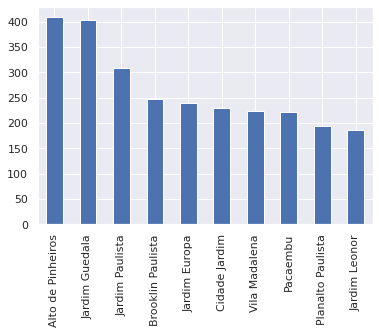

In [ ]:
bairros_top[:10].plot.bar()  # usando um slice para selecionar apenas os 10 primeiros em frequência e criar um gráfico

# Desafios

## Aula 1

### Desafio 1
Realizar a média da metragem para cada um dos bairros (Paulo)

In [ ]:
dados.groupby("Bairro")["Metragem"].mean()

Bairro
Aclimação           253.06
Alto da Boa Vista   418.88
Alto da Lapa        294.34
Alto da Mooca       270.05
Alto de Pinheiros   433.44
                     ...  
Vila Água Funda     152.20
Água Branca         191.00
Água Fria           165.42
Água Funda          139.00
Água Rasa           340.25
Name: Metragem, Length: 702, dtype: float64

### Desafio 2
Duas formas de selecionar os dados por bairro (consultar os métodos na documentação do pandas) (Thiago)

In [ ]:
bairro_selecionado = "Liberdade"

In [ ]:
dados.query("Bairro == @bairro_selecionado")  # usando query, busca todos as entradas da coluna Bairro que contem a variável 

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Modalidade
4025,Rua Teixeira Mendes,Liberdade,São Paulo,275,3,4,2,900000.00,Venda
4882,Rua Senador Felício dos Santos,Liberdade,São Paulo,600,3,1,4,2000000.00,Venda
5039,NaN,Liberdade,São Paulo,90,3,2,1,600000.00,Venda
5156,NaN,Liberdade,São Paulo,95,3,2,1,600000.00,Venda
5606,NaN,Liberdade,São Paulo,95,3,2,1,600000.00,Venda
5845,Rua Teixeira Mendes,Liberdade,São Paulo,180,4,2,2,750000.00,Venda
6367,Rua Teixeira Mendes,Liberdade,São Paulo,185,4,2,2,750000.00,Venda
7284,NaN,Liberdade,São Paulo,150,3,2,2,1040000.00,Venda


In [ ]:
dados.loc[dados["Bairro"] == bairro_selecionado]  # usando loc

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Modalidade
4025,Rua Teixeira Mendes,Liberdade,São Paulo,275,3,4,2,900000.00,Venda
4882,Rua Senador Felício dos Santos,Liberdade,São Paulo,600,3,1,4,2000000.00,Venda
5039,NaN,Liberdade,São Paulo,90,3,2,1,600000.00,Venda
5156,NaN,Liberdade,São Paulo,95,3,2,1,600000.00,Venda
5606,NaN,Liberdade,São Paulo,95,3,2,1,600000.00,Venda
5845,Rua Teixeira Mendes,Liberdade,São Paulo,180,4,2,2,750000.00,Venda
6367,Rua Teixeira Mendes,Liberdade,São Paulo,185,4,2,2,750000.00,Venda
7284,NaN,Liberdade,São Paulo,150,3,2,2,1040000.00,Venda


### Desafio 3 
Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, tentar colocar alguma conclusão (Thiago)

Text(0.5, 1.0, 'Histogramas variados')

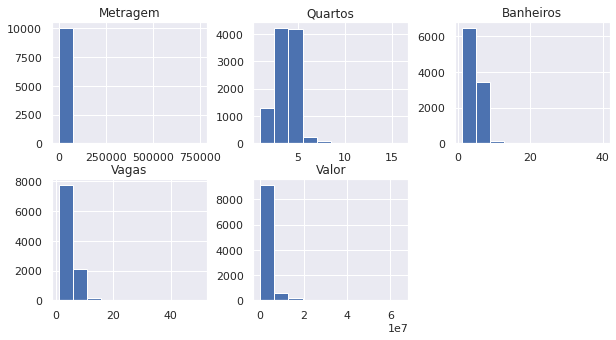

In [ ]:
dados.hist(figsize=(10,8), layout=(3,3), bins=10) # histogramas variados e sem sentido
plt.title('Histogramas variados')

Text(0.5, 1.0, 'Amostra de número de quartos')

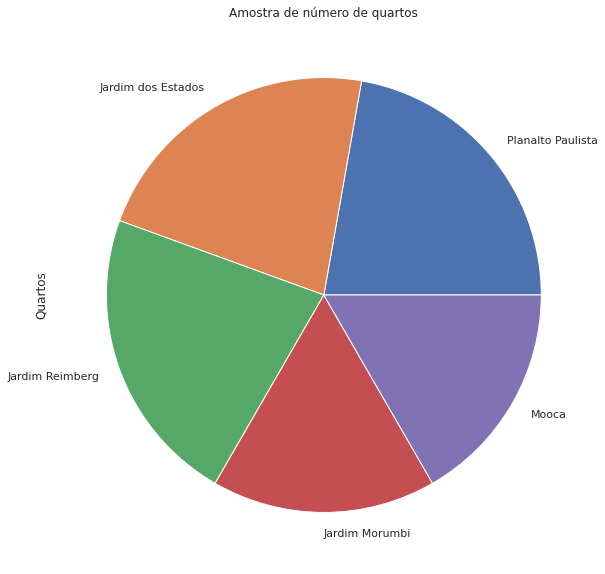

In [ ]:
dados.iloc[:5, [1 ,4]].set_index("Bairro").plot.pie(subplots = True, legend = False, figsize = (10,10))  # aqui um plot tosco feito com base no iloc, selecionando as 5 primeiras linhas do dataframe, depois as colunas 1 (Bairro) e 4 (Quartos), e tornando os bairros como índice
plt.title('Amostra de número de quartos')

Text(0.5, 1.0, 'Amostra de Média de Metragem de Bairros')

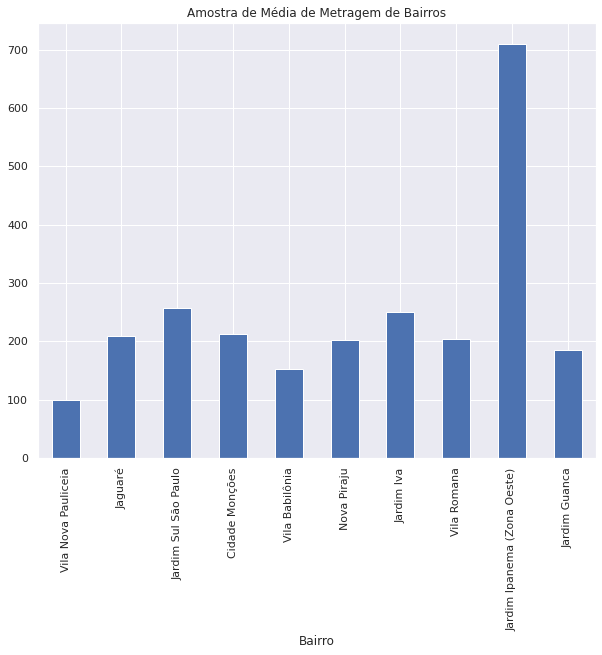

In [ ]:
dados.groupby("Bairro")["Metragem"].mean().sample(10).plot.bar(figsize=(10,8))
plt.title('Amostra de Média de Metragem de Bairros')

### Desafio 4
Pegar outros estatísticas dos dados, média, mediana, mim, max (Vivi)

In [ ]:
# mostrando os imóveis com maior metragem em cada bairro
# podemos trocar pelos métodos min() para menor metragem, mean() para média e std() para desvio padrão

dados.groupby("Bairro")["Metragem"].max().sort_values(ascending=False)

Bairro
Jardim Guedala                        750000
Sítio Represa                          37000
Jardim da Glória                       35677
Santo Amaro                             7126
Vila Castelo                            2850
                                       ...  
Cidade Antônio Estevão de Carvalho        60
Jardim Nova Germania                      57
Jardim Benfica                            48
Vila Leonor                               46
Vila Guaca                                10
Name: Metragem, Length: 702, dtype: int64

### Desafio 5
Descobrir quais são os bairros que não tem nome de Rua. (Vivi)

In [ ]:
dados["Rua"].isnull().value_counts()  # quantidade de valores nulos que existem em Rua

False    6574
True     3434
Name: Rua, dtype: int64

In [ ]:
dados[dados["Rua"].isnull()]["Bairro"].value_counts()  # fazendo um slice de dados["Rua"] dentro de dados e então um slice de Bairro, sintaxe estranha, mas funcionando, creio, e então contando quantas ruas sem informação há em cada bairro

Jardim Guedala                      190
Alto de Pinheiros                   169
Jardim Paulista                     138
Jardim Europa                       128
Jardim Leonor                       118
                                   ... 
Jardim do Colégio (Zona Norte)        1
Alto da Boa Vista                     1
Jardim Aeroporto                      1
Conjunto Residencial Vista Verde      1
Jardim Santo Elias                    1
Name: Bairro, Length: 394, dtype: int64

## Aula 2

### Desafio 1


### Desafio 2


### Desafio 3

### Desafio 4

### Desafio 5


## Aula 3

### Desafio 1


### Desafio 2


### Desafio 3

### Desafio 4

### Desafio 5


Desafio 1

Desafio 2

Desafio 3

Desafio 4

## Aula 4

### Desafio 1


### Desafio 2


### Desafio 3

### Desafio 4

### Desafio 5


## Aula 5

### Desafio 1


### Desafio 2


### Desafio 3

### Desafio 4

### Desafio 5
